In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np
# save np.load
max_features = 10000
maxlen = 500
batch_size = 32
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old


print('Loading data...')

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [12]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 833us/step - loss: 0.6478 - acc: 0.6084 - val_loss: 0.4919 - val_acc: 0.7948
Epoch 2/10
20000/20000 [==============================] - 14s 707us/step - loss: 0.4243 - acc: 0.8162 - val_loss: 0.3985 - val_acc: 0.8320
Epoch 3/10
20000/20000 [==============================] - 14s 723us/step - loss: 0.3080 - acc: 0.8747 - val_loss: 0.3935 - val_acc: 0.8228
Epoch 4/10
20000/20000 [==============================] - 14s 722us/step - loss: 0.2375 - acc: 0.9090 - val_loss: 0.3688 - val_acc: 0.8446
Epoch 5/10
20000/20000 [==============================] - 15s 739us/step - loss: 0.1759 - acc: 0.9352 - val_loss: 0.4088 - val_acc: 0.8626
Epoch 6/10
20000/20000 [==============================] - 14s 701us/step - loss: 0.1174 - acc: 0.9597 - val_loss: 0.4042 - val_acc: 0.8536
Epoch 7/10
20000/2

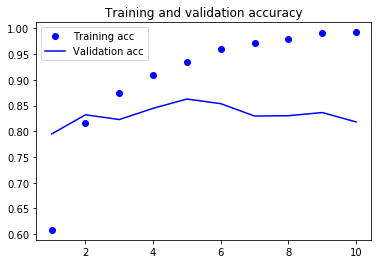

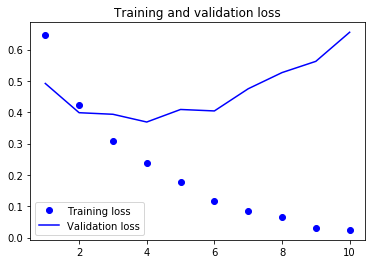

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.5094 - acc: 0.7609 - val_loss: 0.3359 - val_acc: 0.8704
Epoch 2/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2901 - acc: 0.8852 - val_loss: 0.2814 - val_acc: 0.8796
Epoch 3/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2332 - acc: 0.9113 - val_loss: 0.3646 - val_acc: 0.8762
Epoch 4/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.1959 - acc: 0.9272 - val_loss: 0.3150 - val_acc: 0.8602
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1723 - acc: 0.9371 - val_loss: 0.3002 - val_acc: 0.8844
Epoch 6/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1552 - acc: 0.9433 - val_loss: 0.3434 - val_acc: 0.8696
Epoch 7/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.1415 - acc: 0.9494 - val_loss: 0.3927 - val_acc: